# Personal Information
Name: **Wenjia Gu**

StudentID: **14153866**

Email: [**wenjia.gu@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **22.03.2024**

# Thesis Topic
Traditional incentives such as carbon taxes, fines, and subsidies have limitations in promoting the diffusion of green innovations. The existing literature suggests that firms' decisions to transition to green practices are heavily influenced by peer effects. This study introduces the novel concept of a 'joint green reputation,' which links a firm’s green reputation with that of its partners, rather than solely assessing an individual firm’s reputation. Employing the joint green reputation enhances the effectiveness of peer effects and addresses the issue of greenwashing, thereby increasing the effectiveness of the diffusion of green innovations.

To examine how joint green reputation affects the adoption of green practices in the supply chain network, the study will utilize agent-based mathematical modeling to simulate the decision-making processes of different stakeholders. By analyzing the actions and interactions between nodes and their neighbors, the study aims to observe the overall emergent effect within the supply chain network. Consequently, the data for this study will be generated entirely from the constructed model, not from existing or collected datasets. Therefore, there was no need to perform initial data cleaning or data analysis typically found in the exploratory data analysis section. Instead, at this stage, my model was defined, and I proposed a mathematical formula for calculating the joint green reputation, based on the theoretical framework provided by the existing literature.

# Supply Chain Network
Below is a conceptual diagram of the supply chain network:
![image](concept.png)
There are many stakeholders with different roles in the supply chain network. This study focuses on three categories of firms: suppliers, manufacturers, and retailers. Each category comprises various nodes. In the given example, within the supplier category, there are three peer firms: Supplier 1, Supplier 2, and Supplier 3. Additionally, these categories of firms collaborate, for example, suppliers provide raw materials to manufacturers, who in turn produce products and supply them to retailers for sale. In the given example, Supplier 2 provides raw materials to Manufacturers 1, 2, and 3, while Manufacturer 1 delivers products to Retailer 2.

When a firm’s green reputation is combined with those of its partners, the peer effect generates a sense of competition. This compels nodes (peer firms) within each category to benchmark against the average joint green reputations of one another and their partners, which serves as a measure of their market competitiveness. Should a firm’s joint green reputation fall below that of its peers, it may consider transitioning to greener practices. Given the heterogeneity of firms, an agent-based mathematical model is employed to simulate the interactions between nodes in the supply chain and their responses to joint green reputation incentives.


# Model
## Define the model
### Adjacency Matrix


The adjacency matrix $A=[a_{ij}]$ of size $n \times n$, where $n = |V|$, models the relationship between firms. The matrix element $A_{ij}$ is defined as:

$$
A_{ij} =
\begin{cases}
1, & \text{if there is a partnership between firm } i \text{ to firm } j \\
0, & \text{otherwise}
\end{cases}
$$


Specifically, complex networks can quantify and analyze these interrelationships through an adjacency matrix. In this case, rows and columns correspond to the firms within the network, and the matrix elements indicate the presence (1) or absence (0) of a relationship between any two firms. If firm A has a partnership with firm B, the corresponding matrix element is set to 1; if not, it is set to 0. The corresponding complex network will have an edge between firm A and firm B if they have a partnership. In this study, all enterprises have the same weight by default, we only need to consider whether there is a corporate relationship between two enterprises, so there are only two cases, 0 and 1.

### N
Referring to the existing literature, we set the number of nodes within the supply chain network to 500, which includes suppliers, manufacturers, and retailers, denoted by $n = 500$. Additionally, $n$ can also serve as a variable in subsequent phases of the simulation experiment. For instance, we may assume $n \in \{200, 500, 1000\}$ to observe the impact of different network sizes on the observed metrics.


### V & E
"V" represents a "vector," which denotes the set of nodes(firms). "E" stands for "edges," indicating the corporate relationships between these nodes(firms). These relationships can be expressed as $E \subseteq V \times V$. Thus, the complex network model can be represented by $G = (V, E)$.

In this study, a randomized network is used, assuming that the degree of the nodes follows a uniform discrete distribution ranging from 1 to 5. This implies that each potential connection between nodes has an equal probability of existence, resulting in uniformly distributed edges.

## Build the complex network model under the supply chain
Now that the most basic network could be created:

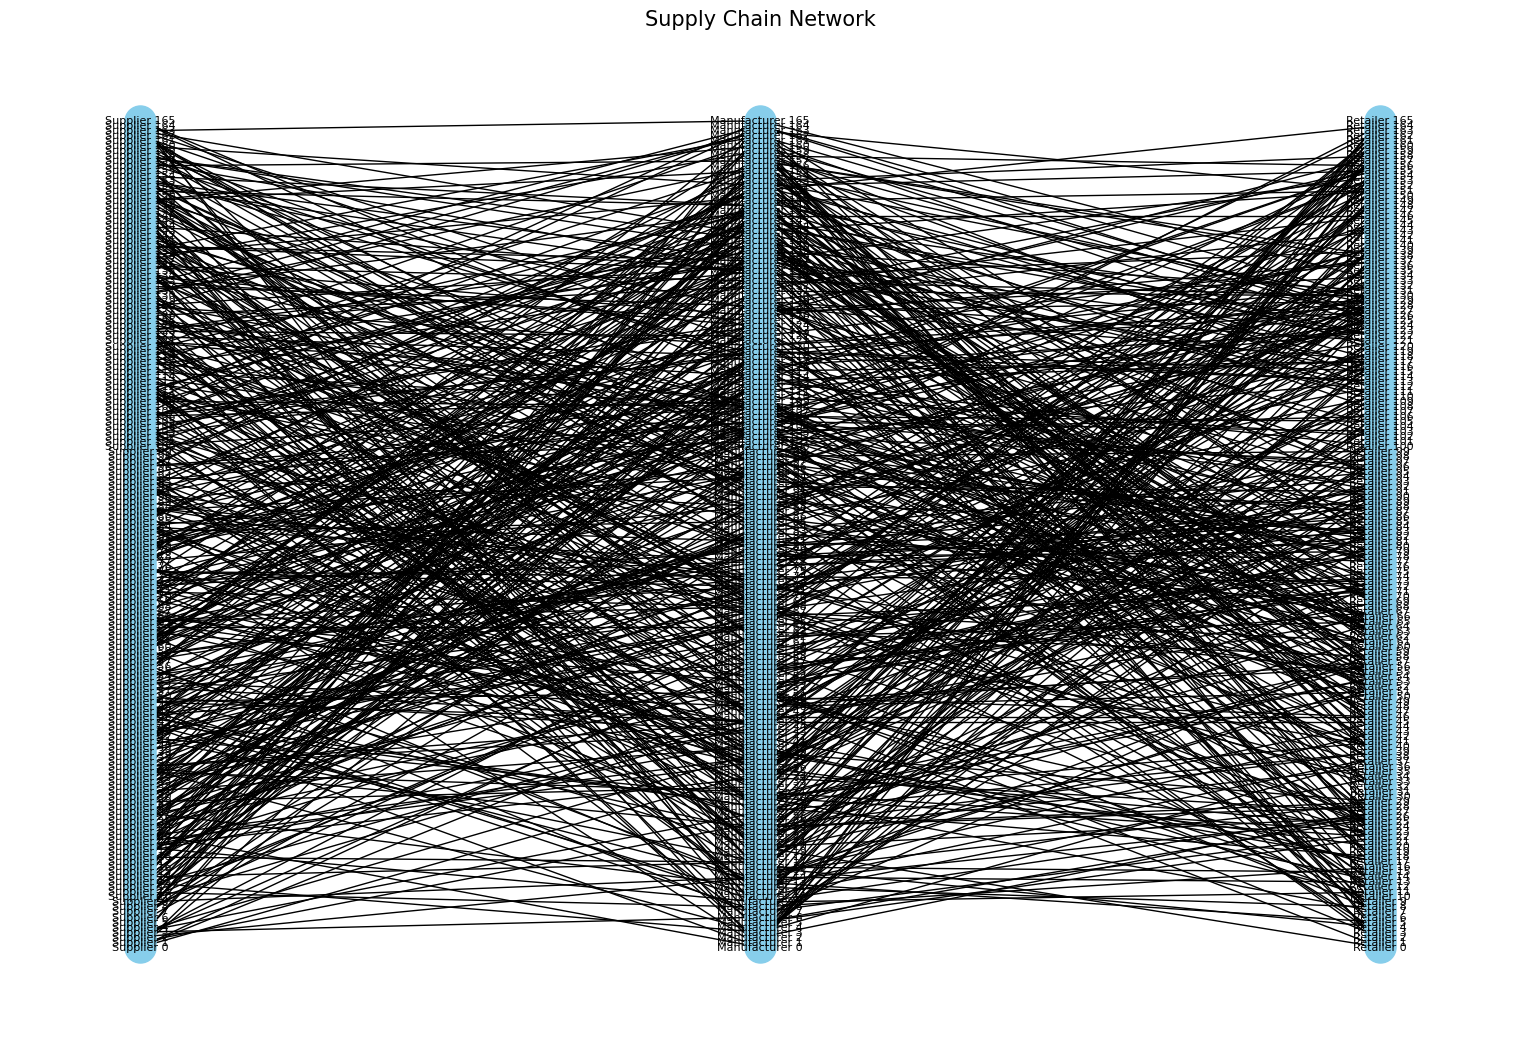

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

num_suppliers = num_manufacturers = num_retailers = 500 // 3

G = nx.Graph()

suppliers = ['Supplier {}'.format(i) for i in range(num_suppliers)]
manufacturers = ['Manufacturer {}'.format(i) for i in range(num_manufacturers)]
retailers = ['Retailer {}'.format(i) for i in range(num_retailers)]

G.add_nodes_from(suppliers, bipartite=0)
G.add_nodes_from(manufacturers, bipartite=1)
G.add_nodes_from(retailers, bipartite=2)

# Create random connections based on a uniform discrete distribution from 1 to 5
for s in suppliers:
    G.add_edges_from((s, m) for m in np.random.choice(manufacturers, np.random.randint(1, 6), replace=False))
    
for m in manufacturers:
    G.add_edges_from((m, r) for r in np.random.choice(retailers, np.random.randint(1, 6), replace=False))

pos = {}
pos.update((node, (1, idx)) for idx, node in enumerate(suppliers)) # Suppliers on left
pos.update((node, (2, idx)) for idx, node in enumerate(manufacturers)) # Manufacturers in middle
pos.update((node, (3, idx)) for idx, node in enumerate(retailers)) # Retailers on right

plt.figure(figsize=(15, 10))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=8)
plt.title('Supply Chain Network', size=15)
plt.show()

## Formula
Based on existing research, we posit that the value of a firm’s joint green reputation is contingent upon two factors: whether the firm itself employs green innovation technology, and the joint reputation values of the firm's partners. From this premise, we propose the following formula:

$$
JR_{i}^{t+1} = (1 - \alpha)T_{i}^t + \alpha \left( \frac{\sum_{j=1}^{n} (a_{ij}JR_{j}^t)}{\sum_{j=1}^{n} a_{ij}} \right)
$$


$JR_{i}$ represents the joint green reputation value of a node $i$.


The expression $\left( \frac{\sum_{j=1}^{n} (a_{ij}JR_{j}^t)}{\sum_{j=1}^{n} a_{ij}} \right)$ calculates the average joint green reputation of node $i$'s partners $j(s)$.

The term $\alpha \in [0, 1]$ denotes the weighting factor, i.e., the proportion of a node’s green transition to the average joint green reputation of its partners that constitutes its own joint green reputation value. For instance, when $\alpha$ at 0.8, then $(1-\alpha)$ would be 0.2. According to the formula, at this point, the joint green reputation value of node $i$ would then comprise 20% of its green transitions and 80% of the average joint green reputation of its partners $j(s)$.

$T_{i}$ indicates whether a node employs green innovations or is undergoing a green transition.

$t$ denotes the time step, signifying that the prevalence of green transition should escalate over time. Initially, the decision to transition to green technologies is randomized for each firm, allowing us to represent the initial state as:
$$
T^0 = (T_1^0, T_2^0, T_3^0, T_4^0, \ldots, T_n^0), T \in \{0, 1\}
$$

Here, 0 signifies the use of polluting technologies, and 1 represents the employment of green innovative technologies, e.g., $T^0 = (1, 0, 0, 1, \ldots, 1)$

A crucial consideration is defining how many nodes are green-transformed at the initial stage of the supply chain network. Given the random nature of each node's initial state, discrepancies in results can be pronounced. To mitigate this, we define a variable $K$ to denote the proportion of nodes transitioning to green practices at the outset. By adjusting the value of $K$, such as setting it to 50%, half of the nodes will start with an initial $T$ value of 0, and the remainder will be 1.

Since $(1 - \alpha)T_{i}^t \in \{0, 1\}$, and $\alpha \left( \frac{\sum_{j=1}^{n} (a_{ij}JR_{j}^t)}{\sum_{j=1}^{n} a_{ij}} \right) \in [0, 1]$. It follows that $JR_{i}^{t+1} \in [0, 1]$.

The next step is to formulate detailed rules for node behavior and interactions within the supply chain network. This aspect requires further consultation with my professor. Presently, by taking into account the potential decisions of the firms and any associated constraints, I have preliminary concepts, which will help the development of the model’s interaction rules.

### Strategies
In this study, firms may respond to joint green reputation incentives in several ways:
- **1.** The firm has a good green reputation on its own and doesn't need to make any changes.
- **2.** Heavy polluters may increase their average green reputation score by either increasing the number of high-reputation partners or decreasing the number of low-reputation partners.
- **3.** Heavy polluters may decide to transition to green production.

Considering the costs associated with transitioning to green practices, firms might prioritize changing partners over undertaking green production. Consequently, we categorize enterprise strategies within the supply chain into four distinct categories, represent$S = \{IP, DP, T, S\}$S\} \) in order of preference, where:

- 'IP' stands for increasing the number of partners,
- 'DP' stands for decreasing the number of partners,
- 'T' stands for transitioning to green production,
- 'S' stands for maintaining the status quo.


### Constraints

It is important to recognize that while some rules are optional, others necessitate support from partner companies. Accordingly, we establish three constraints:

- **1.** Each enterprise is limited to a maximum of five partners.
- **2.** The transition to green practices is irreversible and solely applicable to heavy polluters.
- **3.** Enterprises can unilaterally dissolve partnerships with heavily polluting firms, but forming new partnerships mandates mutual consent.

This model facilitates an exploration of how enterprises respond to and interact under the influence of joint green reputation incentives. For example, if a company's green reputation score falls below the average of its peers, it may choose to alter its partnerships or contemplate a transition to green production. As firms modify their partnerships, the network's corporate relationships are recalibrated, exemplified by a partnership's status changing from 1 to 0 upon termination.


With this agent-based model, we can test and observe how various joint green reputation incentives influence the speed and extent of green production diffusion within the supply chain.